In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
plt.style.use('fivethirtyeight')
%matplotlib inline

# 문제 1

In [8]:

confirmed_df = pd.read_csv('data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('data/csse_covid_19_data/csse_covid_19_daily_reports/10-12-2021.csv')
us_medical_data = pd.read_csv('data/csse_covid_19_data/csse_covid_19_daily_reports_us/10-12-2021.csv')
apple_mobility = pd.read_csv('data/applemobilitytrends-2021-10-11.csv')

C:\Users\whfh1\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
confirmed_df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

# 문제 2

In [10]:
total_data = confirmed_df[confirmed_df["Country/Region"].str.contains("Korea, South|US|Japan|United Kingdom|France")]
total_data["Country/Region"].unique()

array(['France', 'Japan', 'Korea, South', 'US', 'United Kingdom'],
      dtype=object)

In [11]:
total_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21
119,French Guiana,France,3.9339,-53.125800,0,0,0,0,0,0,...,40845,41325,41325,41956,41956,42157,42157,42157,42157,42157
120,French Polynesia,France,-17.6797,149.406800,0,0,0,0,0,0,...,40178,40178,40178,45181,45181,45359,45359,45359,45359,45359
121,Guadeloupe,France,16.2650,-61.551000,0,0,0,0,0,0,...,53106,53106,53544,53544,53544,53544,53544,53544,53544,53544
122,Martinique,France,14.6415,-61.024200,0,0,0,0,0,0,...,41284,41357,41357,41636,41749,41846,41846,41846,41846,41846
123,Mayotte,France,-12.8275,45.166244,0,0,0,0,0,0,...,20274,20323,20337,20373,20373,20385,20385,20385,20385,20397


In [12]:
cols = confirmed_df.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/3/21', '10/4/21', '10/5/21', '10/6/21', '10/7/21', '10/8/21',
       '10/9/21', '10/10/21', '10/11/21', '10/12/21'],
      dtype='object', length=634)

In [13]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [14]:
dates = confirmed.keys()
total_cases = []
total_deaths = [] 
total_recovered = [] 
total_active = [] 
mortality_rate = []
recovery_rate = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()

     # confirmed, deaths, recovered, and active
    total_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    

In [15]:
total_cases = np.array(total_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [16]:
# Getting daily increases 

In [17]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

In [18]:
# confirmed cases
world_daily_increase = daily_increase(total_cases)
# deaths
world_daily_death = daily_increase(total_deaths)
# recoveries
world_daily_recovery = daily_increase(total_recovered)



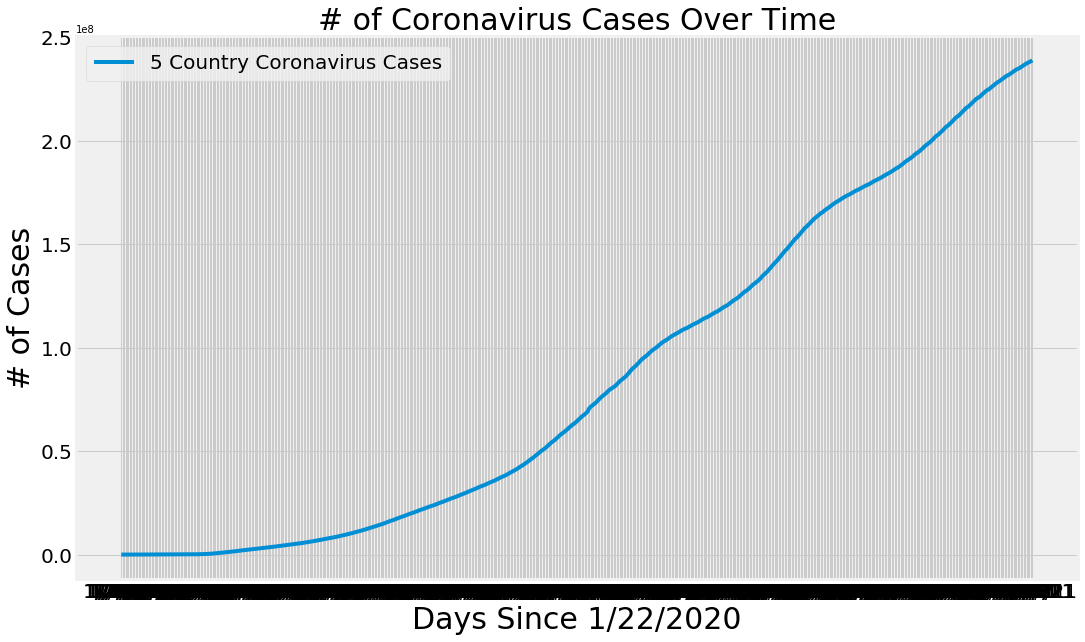

In [20]:
plt.figure(figsize=(16, 10))
plt.plot(dates, total_cases)
#plt.plot(dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['5 Country Coronavirus Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

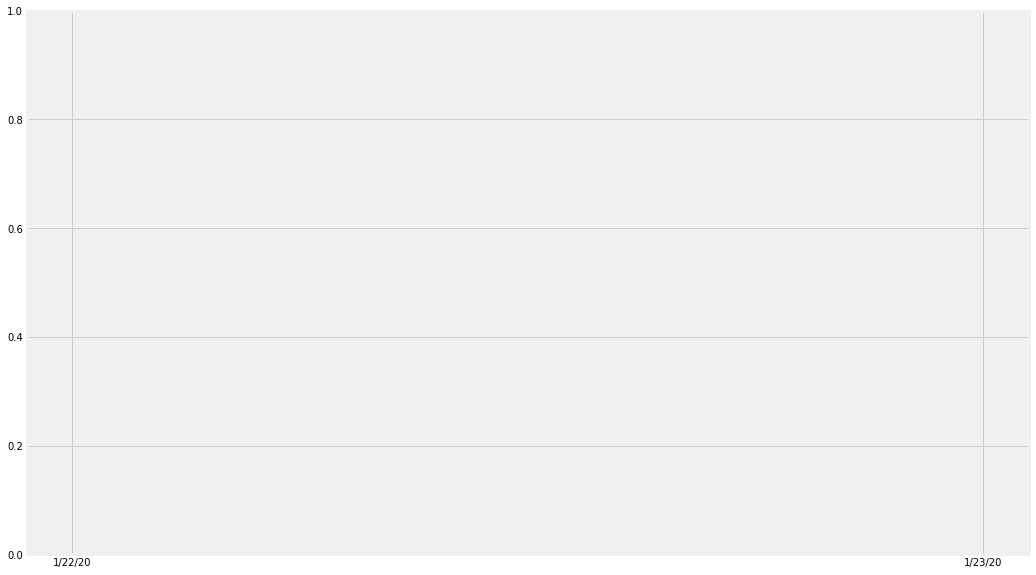

In [22]:
plt.figure(figsize=(16, 10))
plt.bar(dates, world_daily_increase)
#plt.plot(dates, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
#plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# 문제 3

In [23]:
def country_plot(x, y1, y2, y3,country):
    # window is set as 14 in in the beginning of the notebook 
    window = 14
    plt.figure(figsize=(16, 10))
    plt.plot(x, y1)
    plt.legend(['{} Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y2)
    plt.legend(['{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y3)
    plt.legend(['{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

In [24]:
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
    
    for i in dates:
        country_cases.append(confirmed_df[confirmed_df['Country/Region']==country_name][i].sum())
        country_deaths.append(deaths_df[deaths_df['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths)

In [25]:
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
    
    country_plot(dates, country_cases, country_daily_increase, country_daily_death, country_name)

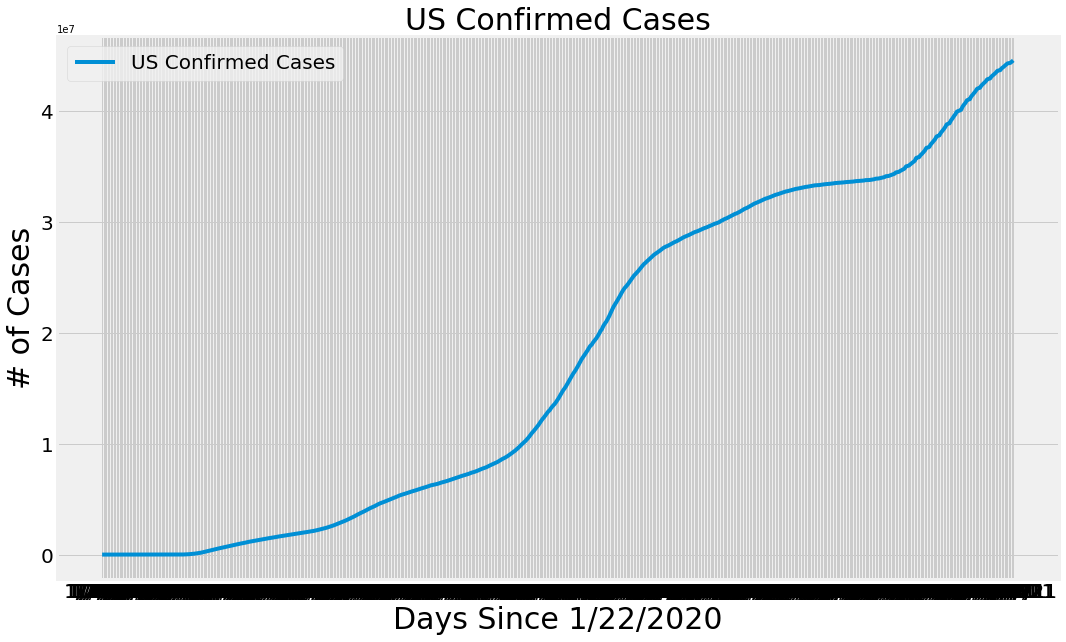

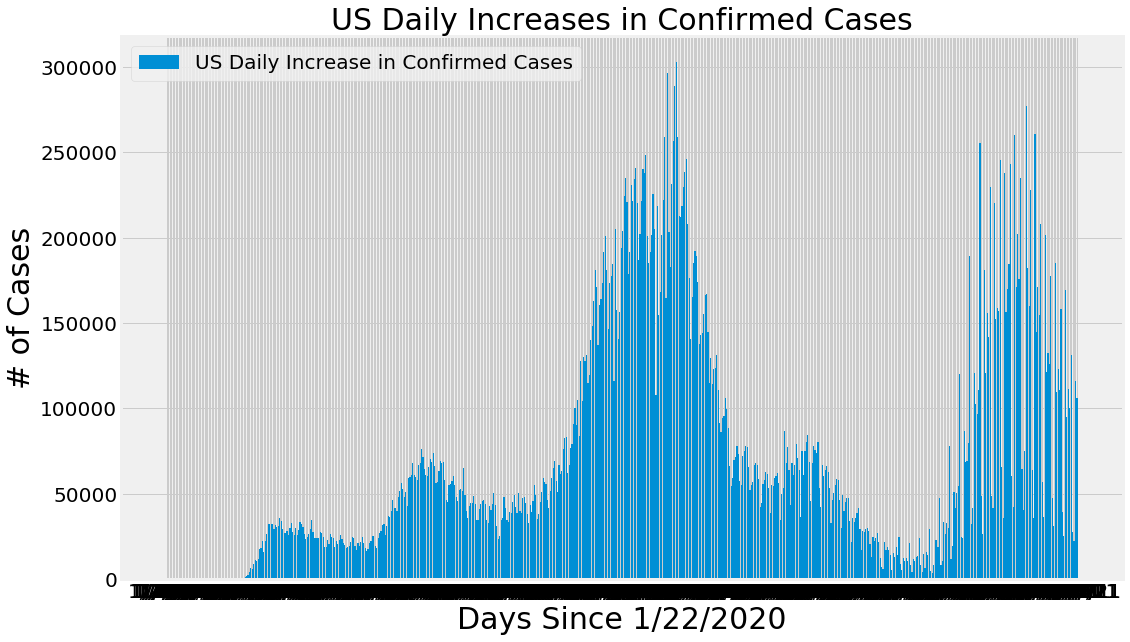

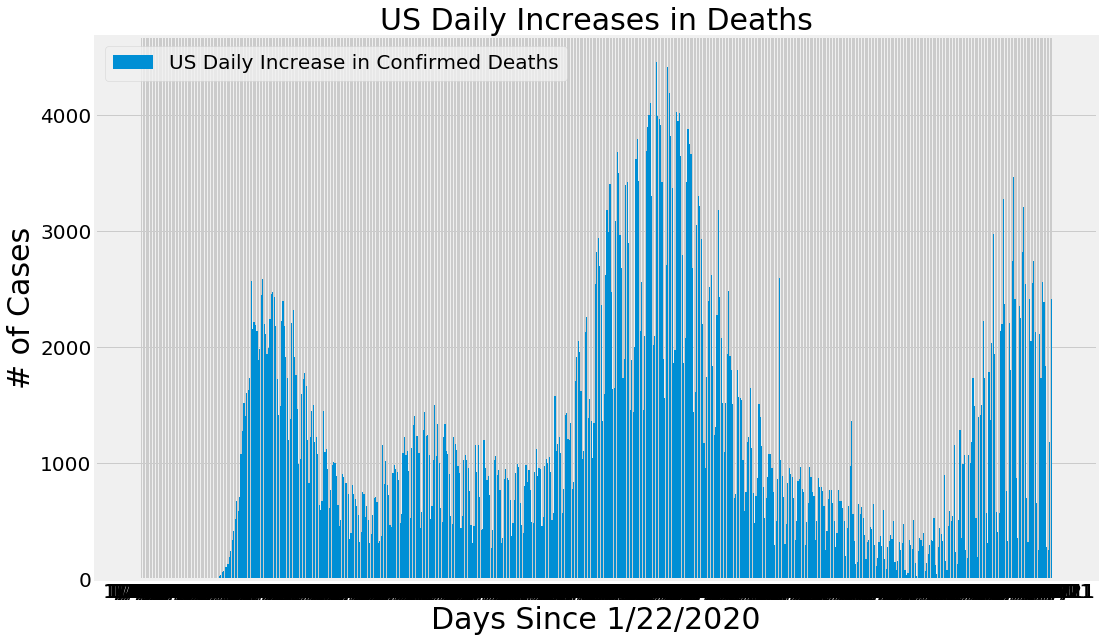

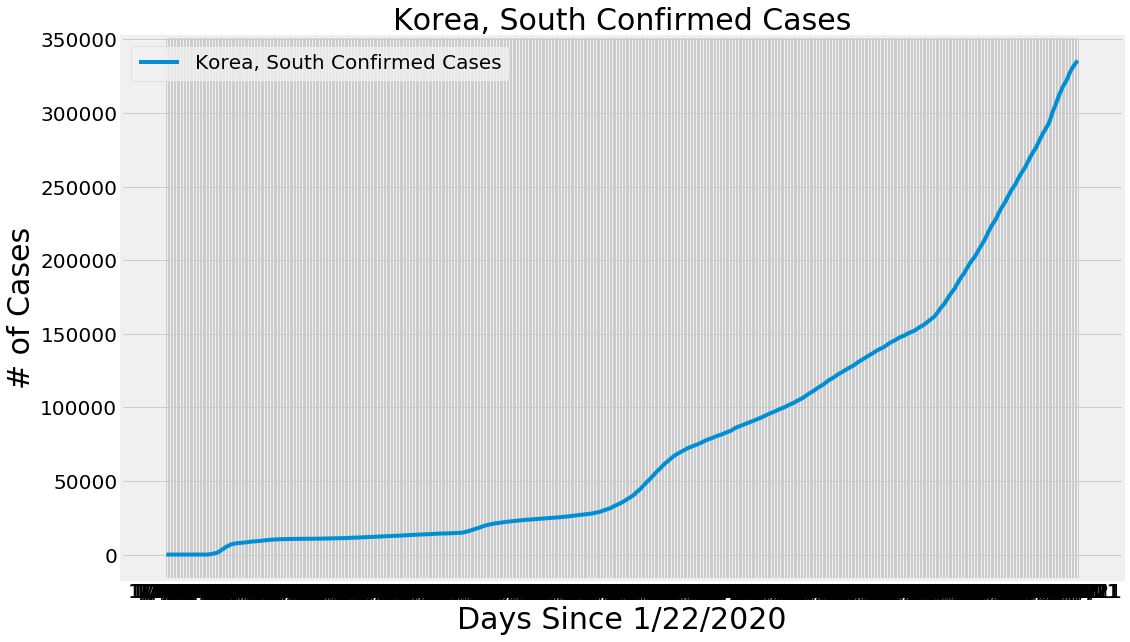

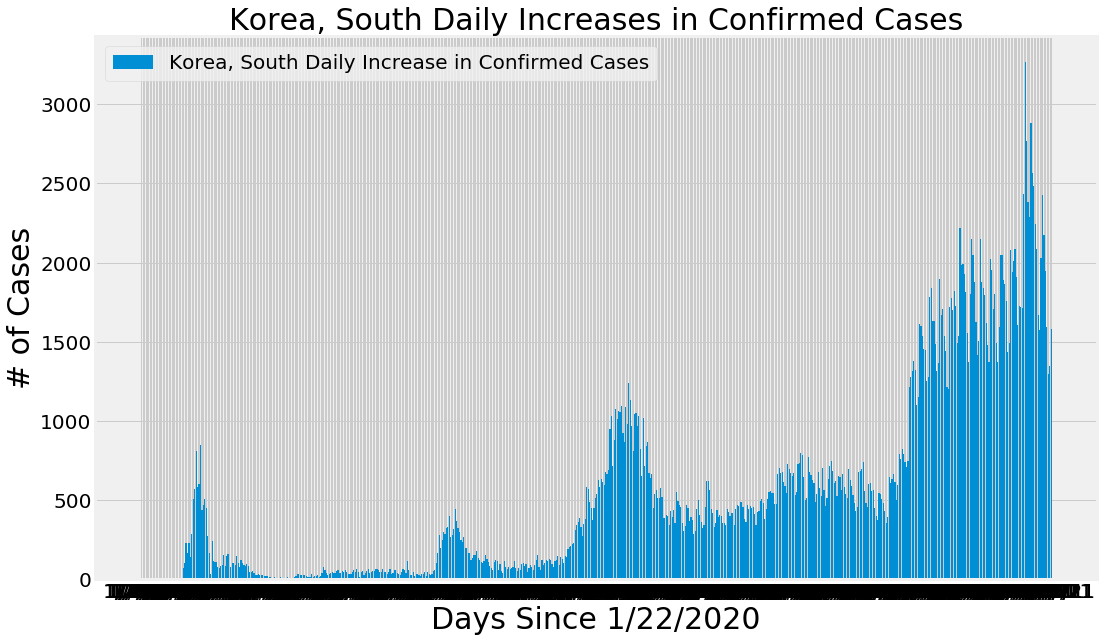

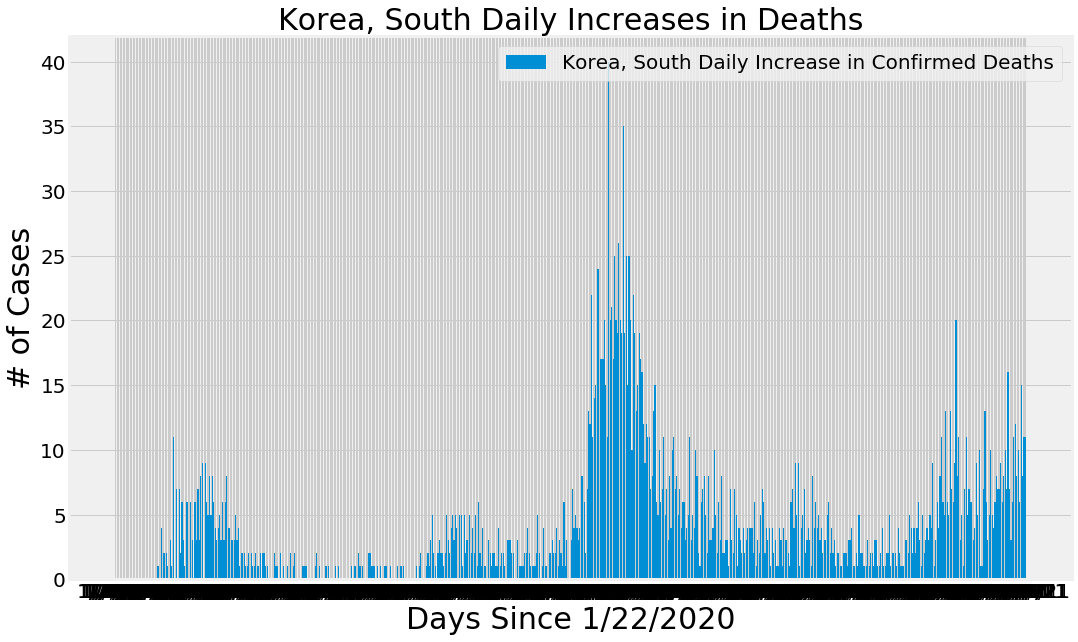

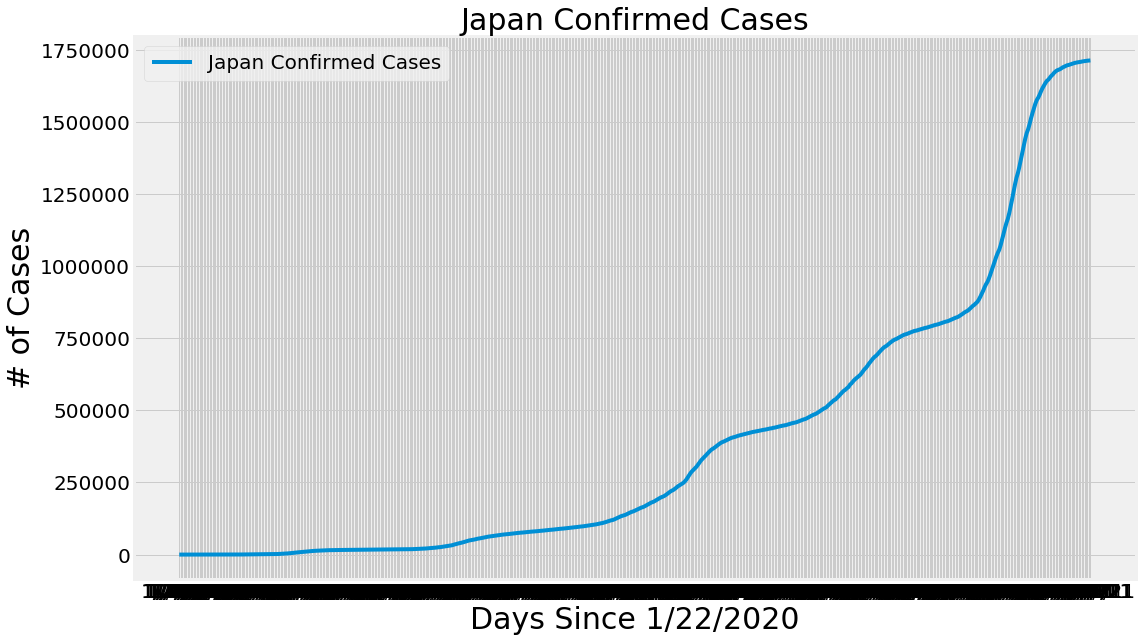

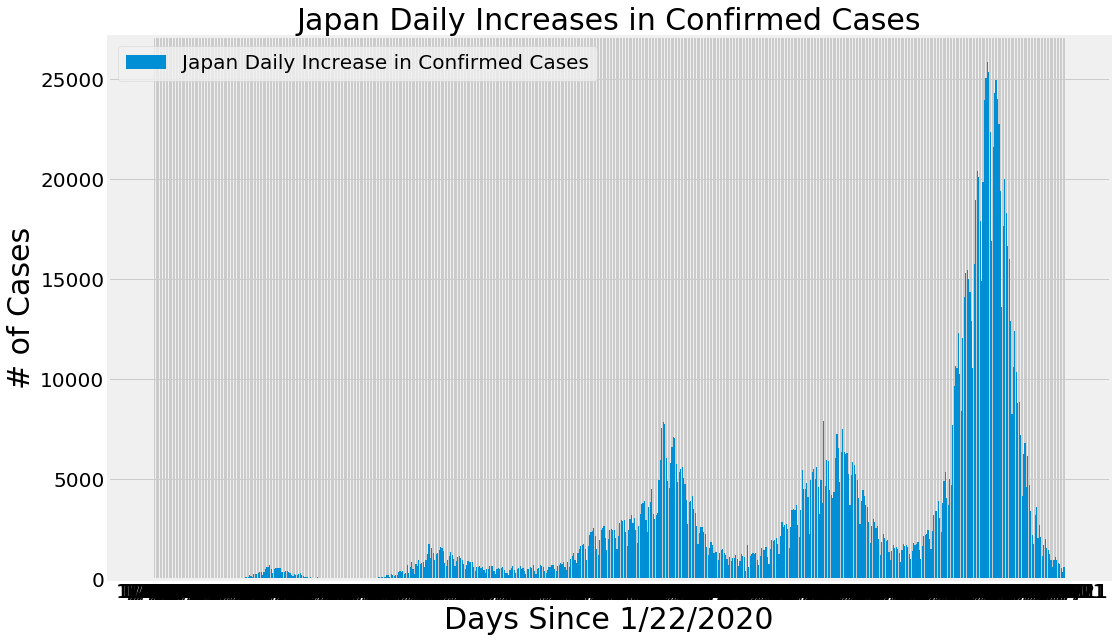

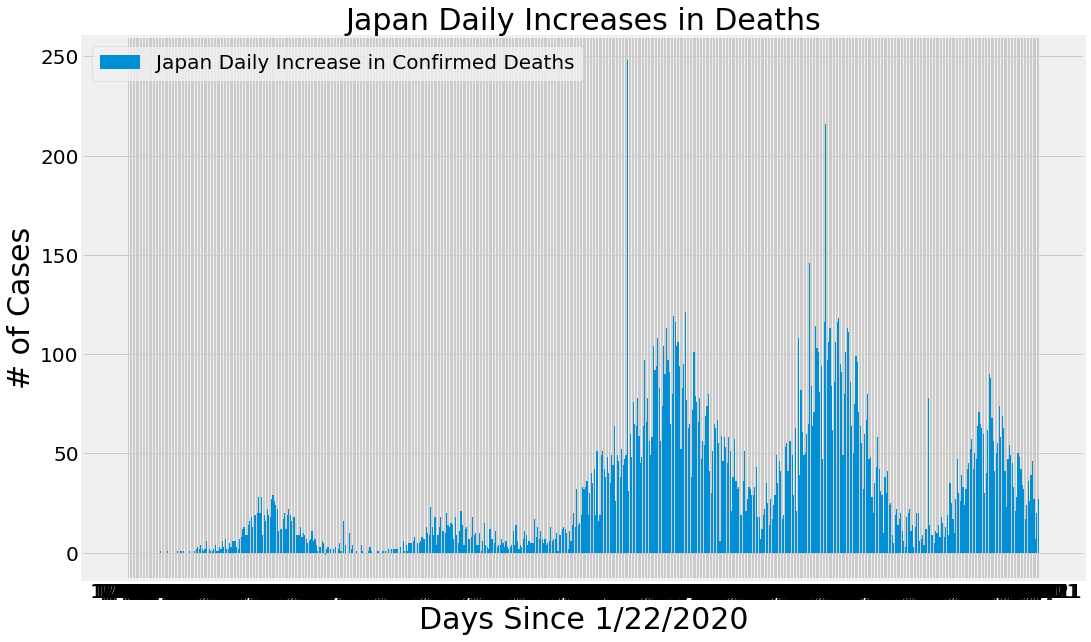

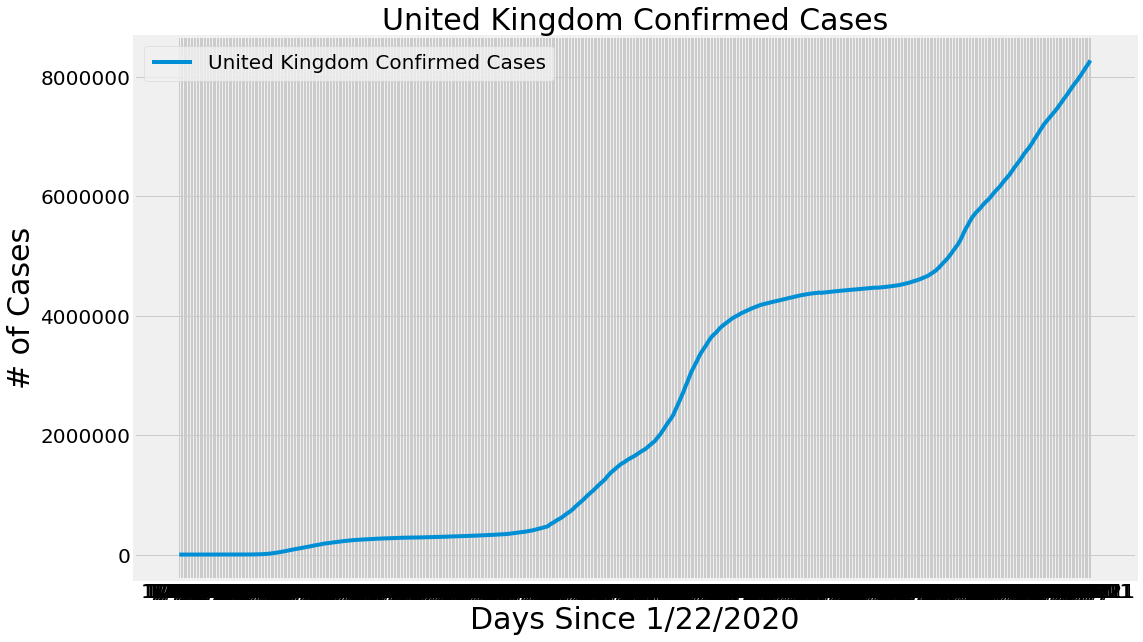

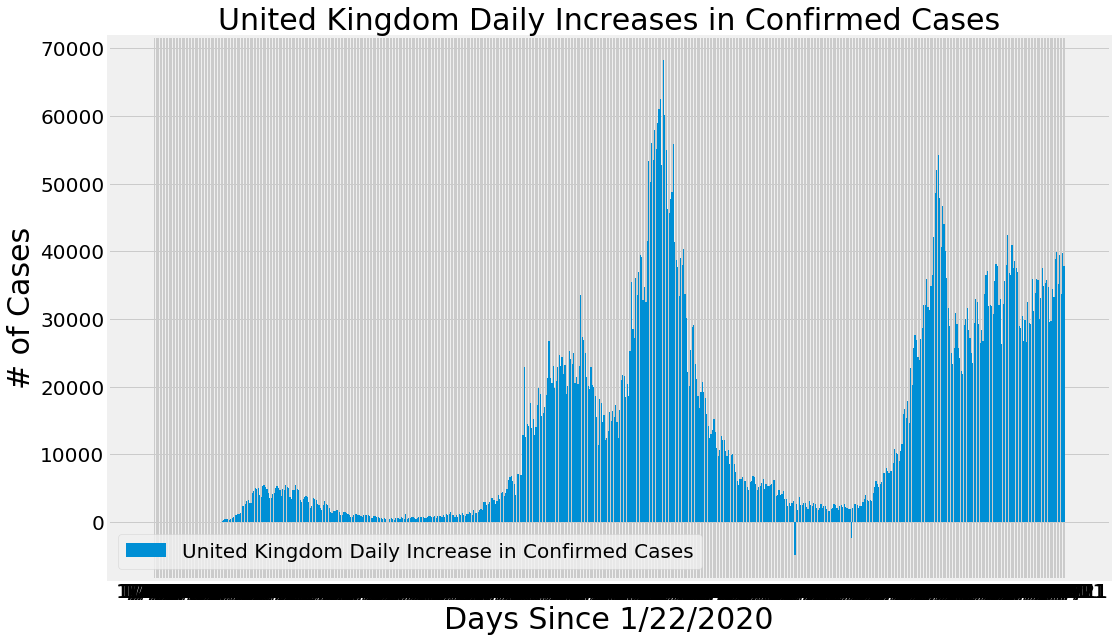

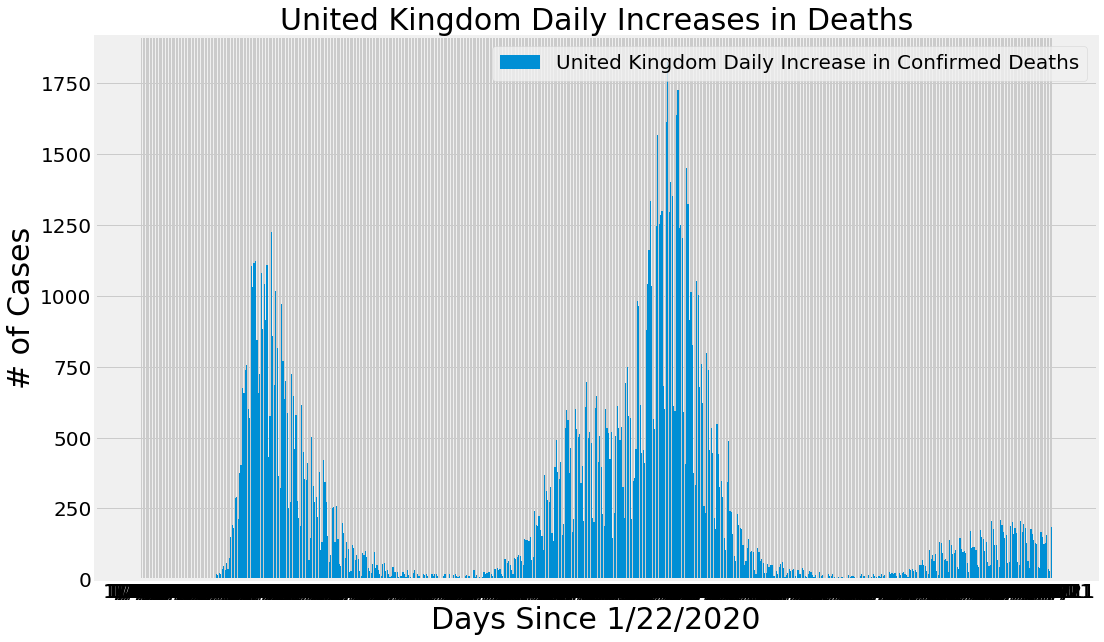

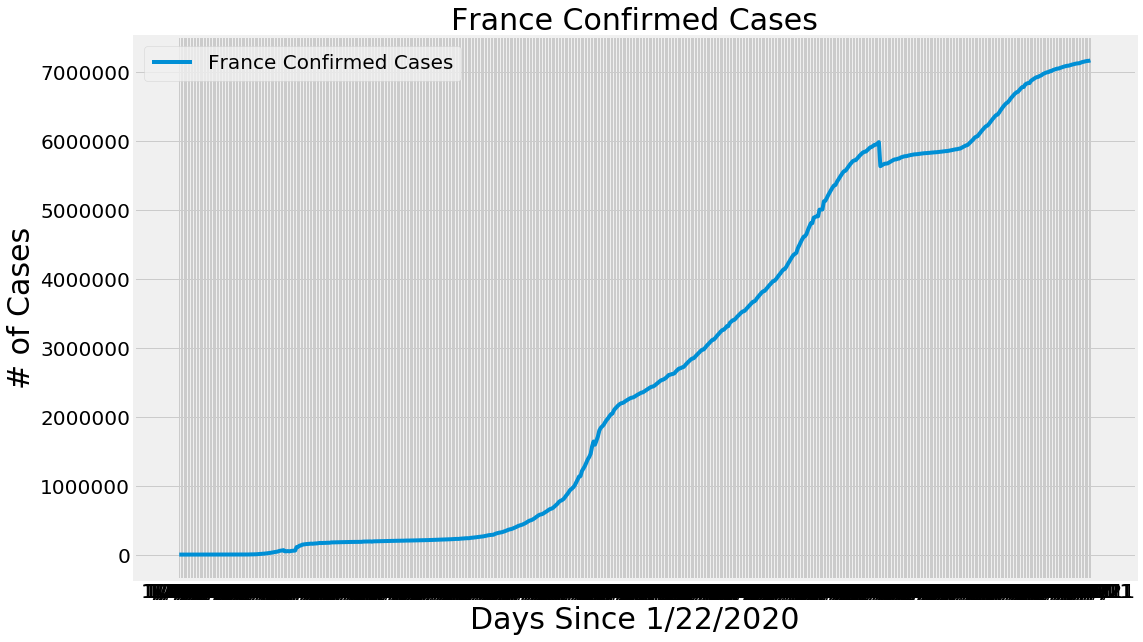

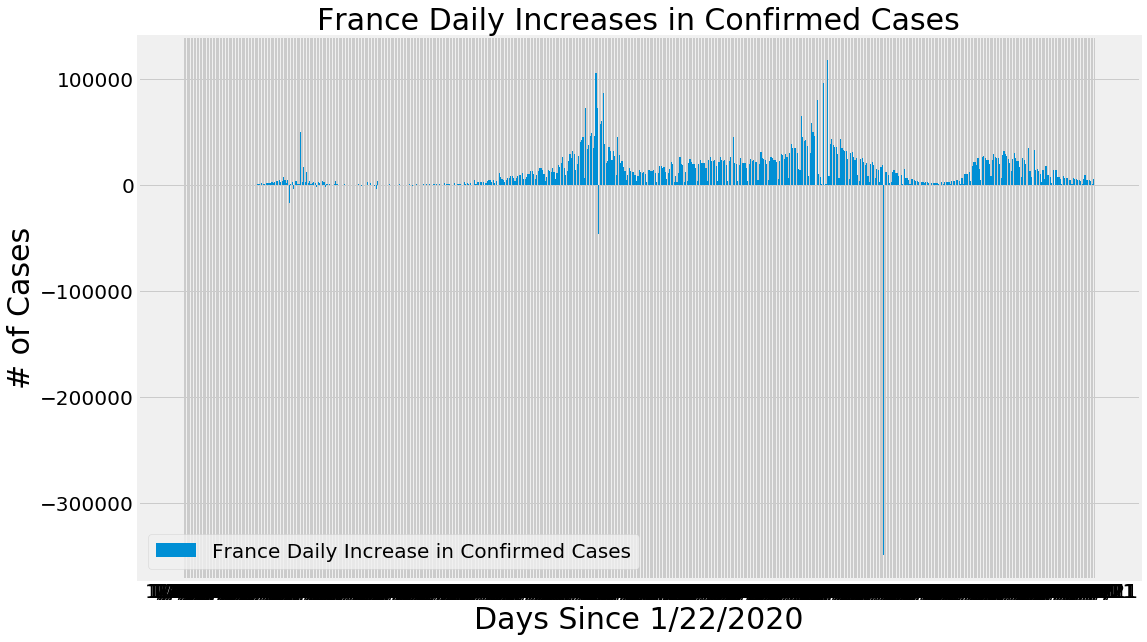

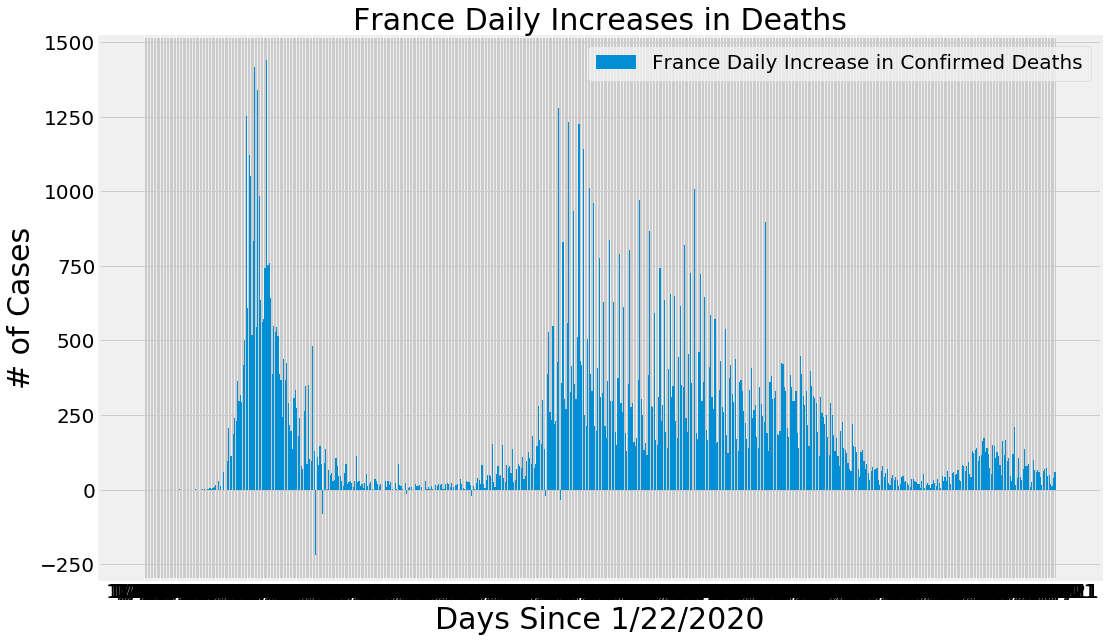

In [26]:
countries = ['US','Korea, South','Japan','United Kingdom','France'] 
for country in countries:
    country_visualizations(country)

# 문제 4

In [ ]:
def country_plot(x, y1, y2, y3,country, num):
    # window is set as 14 in in the beginning of the notebook 
    window = 14
    plt.figure(figsize=(16, 10))
    plt.plot(x, y1)
    plt.legend(['{} Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y2)
    plt.legend(['{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y3)
    plt.legend(['{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()


In [ ]:
def get_country_info(country_name, country_num):
    country_cases = []
    country_deaths = []
    
    for i in dates:
        country_cases.append(confirmed_df[confirmed_df['Country/Region']==country_name][i].sum() / country_num)
        country_deaths.append(deaths_df[deaths_df['Country/Region']==country_name][i].sum() / country_num)
    return (country_cases, country_deaths)

In [ ]:
def country_visualizations(country_name, country_num):
    country_info = get_country_info(country_name,country_num)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
    
    country_plot(dates, country_cases, country_daily_increase, country_daily_death, country_name, country_num)

In [ ]:
countries = {"US":329500000,'Korea, South':51780000,'Japan':125800000,'United Kingdom':67220000,'France':67390000}
for country, num in countries.items():
    country_visualizations(country, num)

# 문제 5

In [ ]:
#print(type(world_daily_increase))
for i in range(len(world_daily_increase)):
  if world_daily_increase[i]>1400000:
    print(i)
print(len(world_daily_increase))

In [ ]:
total_data.columns #총 634개 중에서 앞의 4행 빼고 계산한 것이므로 323번째 해당하는 날짜는 컬럼 327번째 있다.

In [ ]:
total_data.columns[327]

#### 1) 12/10/20에 5개 총 나라의 일일증가율의 합이 가장 높았다.

#### 2) daily_increase 비율을 보면 일본을 제외한 나머지 국가의 그래프 추세는 비슷하다

# 문제 6

#### - France는 Daily increase와 confirmed된 수가 줄어들고 있다. 하지만 나머지 네개의 나라는 daily increase도 다시 감소추세에 있다.
#### - 한국 역시 다른 나라처럼 daily increase 비율을 봤을 때 감소하는 양상이고 사망률도 감소하는 추세이다.